In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
import tensorflow as tf
tf.__version__

'2.12.0-rc1'

In [3]:
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D

In [4]:
from sklearn.metrics import classification_report

## Building a CNN Model


In [5]:
model=Sequential()

In [6]:
model.add(Convolution2D(64,(5,5),input_shape=(48,48,1),activation='relu'))
model.add(Convolution2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=7,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 20, 20, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                        

In [35]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

: 

## Image Argumentation

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './Image_Generator/Training/',
        target_size=(48,48),
        batch_size=512,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        './Image_Generator/Testing/',
        target_size=(48,48),
        batch_size=512,
        color_mode="grayscale",
        class_mode='categorical')


Found 35887 images belonging to 7 classes.
Found 0 images belonging to 7 classes.


In [11]:
filepath = os.path.join("./emotion_detector_models/model_v{epoch}.hdf5")

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_accuracy',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')
callbacks = [checkpoint]

In [12]:
nb_train_samples = 28709
nb_validation_samples = 7178
batch_size=512

In [13]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples// batch_size,
        epochs=50,
        validation_data=validation_generator,
        callbacks = callbacks,
        validation_steps=nb_validation_samples // batch_size)

C:\Users\62821\AppData\Local\Temp\ipykernel_22488\2788044868.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/50
56/56 [==============================] - 402s 7s/step - loss: 1.8163 - accuracy: 0.2453
Epoch 2/50
56/56 [==============================] - 334s 6s/step - loss: 1.7644 - accuracy: 0.2676
Epoch 3/50
56/56 [==============================] - 268s 5s/step - loss: 1.7259 - accuracy: 0.3016
Epoch 4/50
56/56 [==============================] - 254s 5s/step - loss: 1.6887 - accuracy: 0.3288
Epoch 5/50
56/56 [==============================] - 271s 5s/step - loss: 1.6579 - accuracy: 0.3474
Epoch 6/50
56/56 [==============================] - 239s 4s/step - loss: 1.6184 - accuracy: 0.3613
Epoch 7/50
56/56 [==============================] - 226s 4s/step - loss: 1.5966 - accuracy: 0.3733
Epoch 8/50
56/56 [==============================] - 225s 4s/step - loss: 1.5664 - accuracy: 0.3880
Epoch 9/50
56/56 [==============================] - 253s 5s/step - loss: 1.5362 - accuracy: 0.4014
Epoch 10/50
56/56 [==============================] - 261s 5s/step - loss: 1.5055 - accuracy: 0.4175
Epoch 11/

KeyError: 'val_acc'

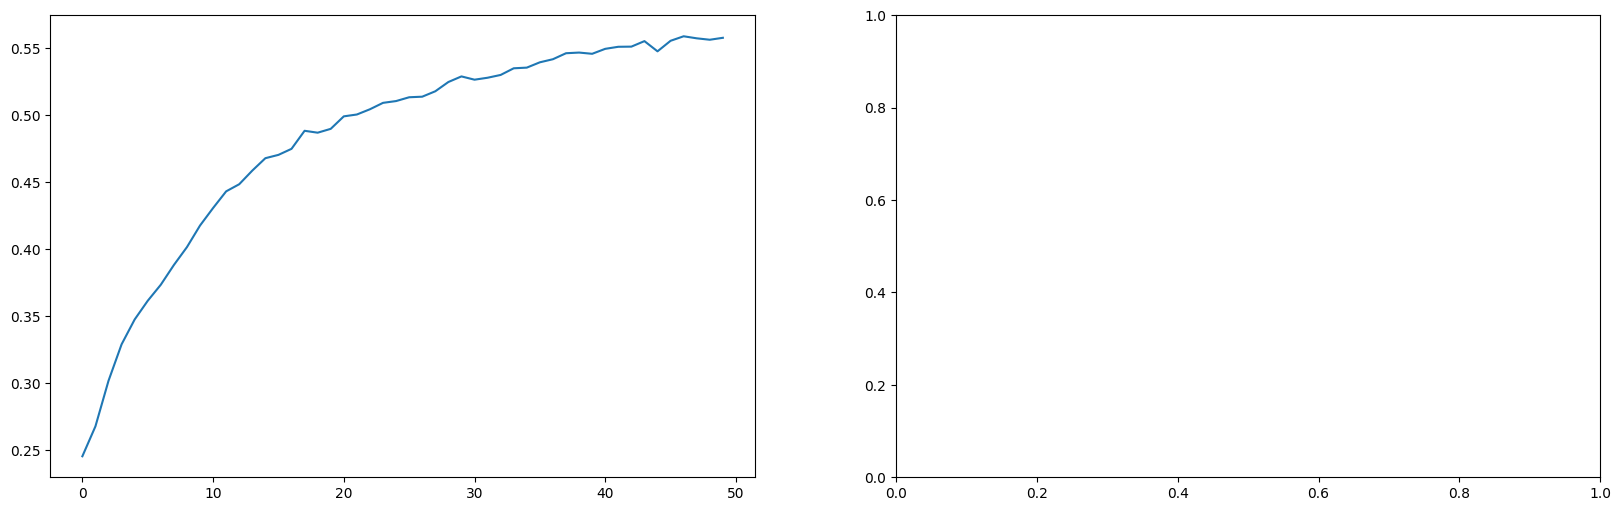

In [31]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.legend()
plt.show()

## Predicting And Checking Accuracy

In [16]:
class_labels = train_generator.class_indices
class_labels

{'Jijik': 0,
 'Marah': 1,
 'Netral': 2,
 'Sedih': 3,
 'Senang': 4,
 'Takut': 5,
 'Terkejut': 6}

In [1]:
predict_generator = test_datagen.flow_from_directory(
        './Image_Generator/Testing/',
        target_size=(48,48),
        batch_size=1,
        color_mode="grayscale",
        shuffle = False,
        class_mode='categorical')

NameError: name 'test_datagen' is not defined

In [19]:
Y_pred = model.predict_generator(predict_generator, nb_validation_samples)

C:\Users\62821\AppData\Local\Temp\ipykernel_22488\881772465.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(predict_generator, nb_validation_samples)


ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [20]:
y_pred = np.argmax(Y_pred,axis=1)

NameError: name 'Y_pred' is not defined

In [21]:
len(y_pred)

NameError: name 'y_pred' is not defined

In [33]:
print(classification_report(predict_generator.classes, y_pred))

NameError: name 'predict_generator' is not defined

: 

#### The Highest Accuracy obtained using model as 59 %.